In [103]:
import os
import cv2
import numpy as np

In [104]:
webcam_path = 'data/webcam'
drawing_path = 'data/drawing'

webcam_pics = os.listdir(webcam_path)
drawing_pics = os.listdir(drawing_path)

webcam_pics, drawing_pics

(['picture.png', 'picture (1).png'],
 ['drawing5.png',
  'picture.png',
  'picture_3.png',
  'picture (1).png',
  'picture_1.png',
  'picture_2.png',
  'picture_1 (1).png',
  'picture_6.png',
  'drawing (2).png',
  'drawing (3).png'])

In [105]:
def preprocess_webcam_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    
    img = img / 255.0
    # print(img.shape)
    # img = np.reshape(i

    return img

In [106]:
full_path = os.path.join(webcam_path, webcam_pics[0])
processed_webcam_image = preprocess_webcam_image(full_path)
processed_webcam_image.shape

(28, 28)

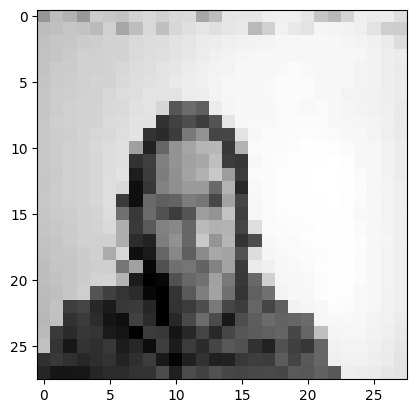

In [107]:
import matplotlib.pyplot as plt

plt.plot()
plt.imshow(processed_webcam_image, cmap=plt.get_cmap('gray'))
plt.show()

In [108]:
import tensorflow as tf
from tensorflow.keras.models import load_model

def preprocess_drawing_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    img = cv2.resize(img, (28, 28))

    img[img[:, :, 3] == 0] = [255, 255, 255, 255]

    img = img[:, :, :3] 

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_gray = cv2.equalizeHist(img_gray)

    img_gray = img_gray / 255.0

    return img_gray



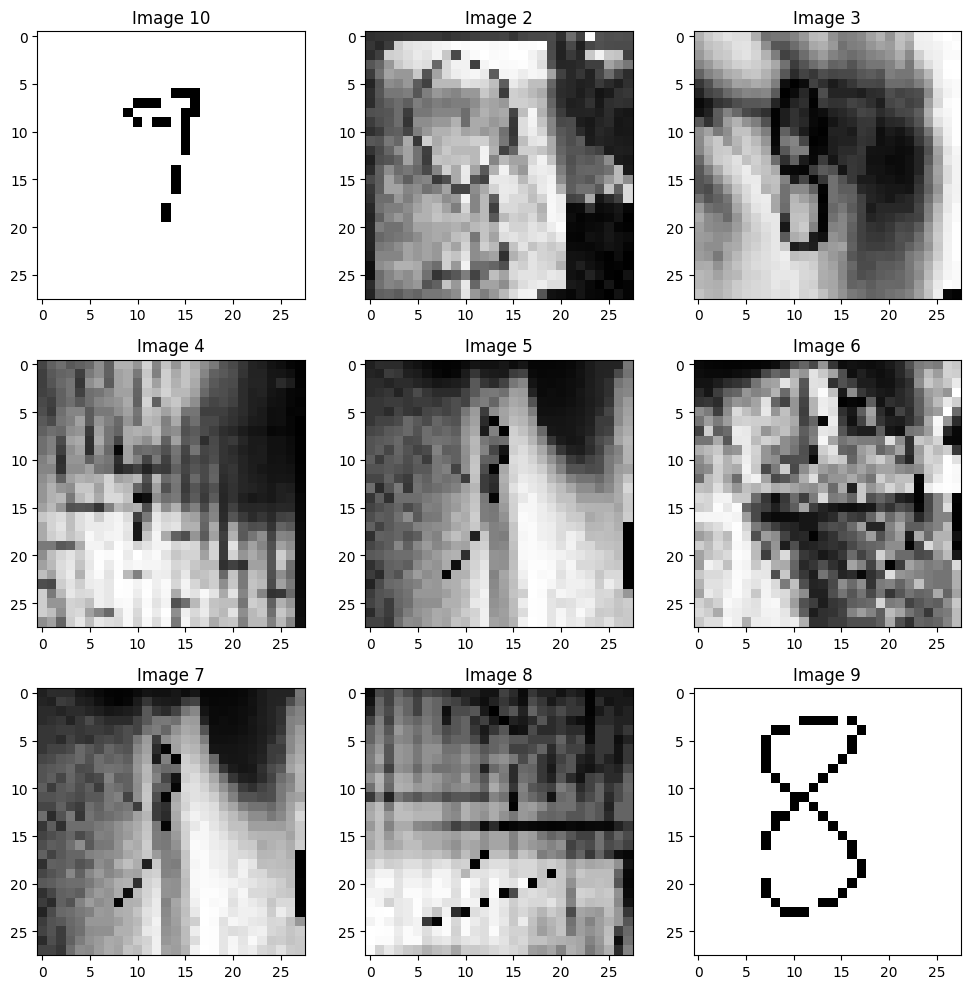

In [109]:
plt.figure(figsize=(10, 10))

for i, pic in enumerate(drawing_pics):
    image_path = os.path.join(drawing_path, pic)
    preprocessed_image = preprocess_drawing_image(image_path)

    plt.subplot(3, 3, (i % 9) + 1)  
    plt.imshow(preprocessed_image, cmap=plt.get_cmap('gray'))
    plt.title('Image {}'.format(i+1))

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 57ms/step


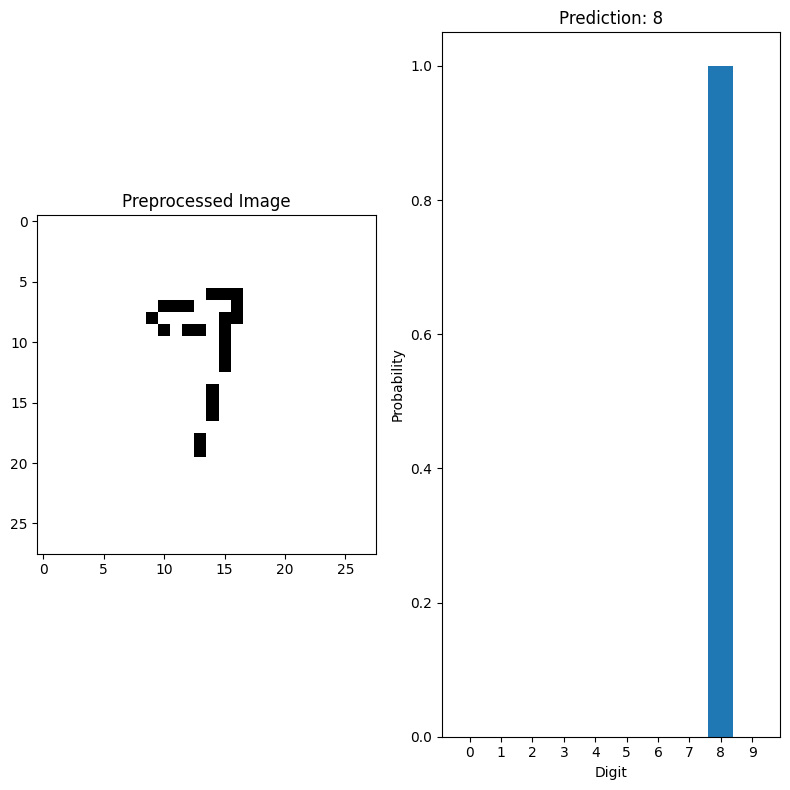

In [110]:
image_path = os.path.join(drawing_path, drawing_pics[9])
preprocessed_image = preprocess_drawing_image(image_path)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_image, cmap=plt.get_cmap('gray'))
plt.title('Preprocessed Image')

model = load_model('../models/mnist_model_digits.h5')

def predict_image(image):
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    return prediction

prediction = predict_image(preprocessed_image)
predicted_label = np.argmax(prediction)

plt.subplot(1, 2, 2)
plt.bar(range(10), prediction[0])
plt.xticks(range(10))
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Prediction: {}'.format(predicted_label))

plt.tight_layout()
plt.show()